In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

exp_dir = Path('./data')
exp_list = ['1app', '10app1', '10app2', '30app']
tracing_data_list = [pd.read_csv(open(exp_dir / f'{exp}.csv', 'rb')) for exp in exp_list]

# plt initialization
plt.rcParams['font.sans-serif']=['SimHei']

tracing_data_list[1]

,ts,rss_ss,rss_sf,rss_ui,rss_ms,mem_free,mem_available,cache,swap_cached,mem_locked,...,pgfree,pgpgin,pgpgout,slabs_scanned,pgfault,pgmajfault,avg_load,kernel_locks,voltage,temp
0,1.669948e+09,683728.0,32868.0,191028.0,11128.0,3539600.0,6533540.0,2316104.0,205724.0,169336.0,...,6.803089e+07,6.166221e+07,43839544.0,2.008970e+08,9.596928e+06,298825.0,9.91,151,4268.0,390.0
1,1.669948e+09,591624.0,32492.0,197076.0,11208.0,3641128.0,6699348.0,2379572.0,206948.0,169336.0,...,6.825026e+07,6.170838e+07,43856696.0,2.008970e+08,9.724988e+06,299058.0,9.91,145,4268.0,370.0
2,1.669948e+09,585896.0,32444.0,197656.0,11208.0,3630552.0,6765796.0,2399736.0,207008.0,169336.0,...,6.839136e+07,6.172683e+07,43858228.0,2.008970e+08,9.846483e+06,299095.0,9.68,151,4268.0,370.0
3,1.669948e+09,577736.0,32340.0,198108.0,11208.0,3617112.0,6777920.0,2424768.0,207164.0,169336.0,...,6.851984e+07,6.174559e+07,43860192.0,2.008970e+08,9.946908e+06,299185.0,9.19,145,4268.0,380.0
4,1.669948e+09,615160.0,32532.0,232060.0,11460.0,2389696.0,6028332.0,3059244.0,210032.0,169336.0,...,6.898329e+07,6.234717e+07,43876740.0,2.008970e+08,1.013061e+07,301088.0,10.23,163,4268.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,1.670020e+09,567892.0,34504.0,228996.0,11456.0,169504.0,1650208.0,1717928.0,218364.0,169364.0,...,2.594676e+09,1.151060e+09,109398420.0,4.527348e+09,1.202902e+09,7713349.0,58.70,297,4340.0,440.0
7114,1.670020e+09,570164.0,34400.0,229244.0,11068.0,212252.0,1827108.0,1736688.0,198476.0,169364.0,...,2.595102e+09,1.151076e+09,109402700.0,4.527484e+09,1.203105e+09,7714107.0,51.94,296,4340.0,440.0
7115,1.670020e+09,567636.0,34388.0,230152.0,11068.0,223008.0,1939540.0,1745540.0,190888.0,169364.0,...,2.595534e+09,1.151085e+09,109404876.0,4.527619e+09,1.203301e+09,7714646.0,75.76,296,4339.0,450.0
7116,1.670020e+09,567304.0,34352.0,230636.0,11068.0,585964.0,3084420.0,2005484.0,201524.0,169364.0,...,2.596086e+09,1.151344e+09,109409844.0,4.527697e+09,1.203487e+09,7718426.0,66.88,288,4339.0,430.0


In [2]:
import pymannkendall as mk
indicators_intrested_all = pd.DataFrame()
indicators_data_all = pd.DataFrame()
for tracing_data in tracing_data_list:
    indicators_intrested = pd.Series(dtype='str')
    indicators_data = pd.Series(dtype='object')
    for indicator in ['mem_free','mem_available','rss_ms','rss_ss', 'rss_sf', 'rss_ui', 'cache', 'swap_cached', 'mem_locked','mem_shared', 'slab', 'vmalloc_total', 'vmalloc_used', 'kernel_locks']:
        mk_res = mk.original_test(tracing_data[indicator])
        # if mk_res.trend != 'no trend':
        #     print(f"Indicator {indicator} Analysis:")
        #     print(mk_res)
        #     print('-----------------')
        indicators_intrested[indicator] = mk_res.trend
        indicators_data[indicator] = tracing_data[indicator]
        
    for indicator in ['reads_completed','reads_merged','sectors_read','time_read','writes_completed','writes_merged','sectors_write','time_write','io_time','weighted_io_time','discards_completed','discards_merged','sectors_discard','time_discard',
                                    'user_time','nice_time','iowait_time','steal_time','pgfree','pgpgin','pgpgout','slabs_scanned','pgfault','pgmajfault']:
        gap = {}
        gap[indicator] = [tracing_data[indicator][i+1]-tracing_data[indicator][i] for i in range(len(tracing_data[indicator])-1)]
        mk_res = mk.original_test(gap[indicator])
        # if mk_res.trend == 'increasing':
        #     print(f"Indicator {indicator} Analysis:")
        #     print(mk_res)
        #     print('-----------------')
        indicators_intrested[indicator] = mk_res.trend
        indicators_data[indicator] = gap[indicator]
    indicators_intrested_all = pd.concat([indicators_intrested_all, indicators_intrested], axis=1)
    indicators_data_all = pd.concat([indicators_data_all, indicators_data], axis=1)

indicators_intrested_all   

,0,0,0,0
mem_free,decreasing,increasing,decreasing,increasing
mem_available,decreasing,decreasing,increasing,decreasing
rss_ms,decreasing,decreasing,increasing,increasing
rss_ss,decreasing,increasing,increasing,increasing
rss_sf,increasing,increasing,increasing,increasing
rss_ui,increasing,increasing,increasing,increasing
cache,increasing,decreasing,increasing,decreasing
swap_cached,increasing,increasing,increasing,no trend
mem_locked,increasing,increasing,increasing,increasing
mem_shared,increasing,increasing,increasing,increasing


In [3]:
indicators_intrested_all.loc['pgfault', :]= 'increasing'
indicators_intrested_all['count_incre'] = indicators_intrested_all.apply(lambda row: (row == 'increasing').sum(), axis=1)
indicators_intrested_all

,0,0,0,0,count_incre
mem_free,decreasing,increasing,decreasing,increasing,2
mem_available,decreasing,decreasing,increasing,decreasing,1
rss_ms,decreasing,decreasing,increasing,increasing,2
rss_ss,decreasing,increasing,increasing,increasing,3
rss_sf,increasing,increasing,increasing,increasing,4
rss_ui,increasing,increasing,increasing,increasing,4
cache,increasing,decreasing,increasing,decreasing,2
swap_cached,increasing,increasing,increasing,no trend,3
mem_locked,increasing,increasing,increasing,increasing,4
mem_shared,increasing,increasing,increasing,increasing,4


C:\Users\jxche\AppData\Local\Temp\ipykernel_24840\1149050368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicators_intrested_all['count_incre']['rss_ui'] = 3


[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4]

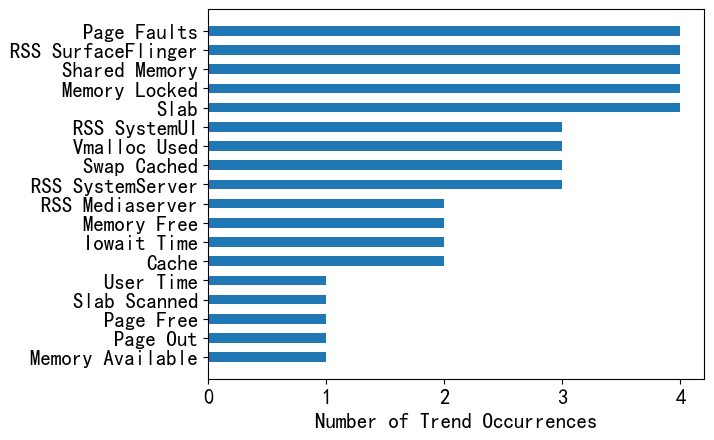

In [13]:
indicators_intrested_all['count_incre']['rss_ui'] = 3
indicators_intrested_all = indicators_intrested_all[indicators_intrested_all['count_incre'] != 0].sort_values('count_incre', ascending=True)
# indicators_intrested_all = indicators_intrested_all.drop('rss_ui')
data = list(indicators_intrested_all['count_incre'])
labels = list(indicators_intrested_all.index)
labels = ['Memory Available', 'Page Out', 'Page Free', 'Slab Scanned', 'User Time', 'Cache', 'Iowait Time', 'Memory Free', 'RSS Mediaserver', 'RSS SystemServer', 'Swap Cached', 'Vmalloc Used', 'RSS SystemUI', 'Slab', 'Memory Locked', 'Shared Memory','RSS SurfaceFlinger', 'Page Faults']
width = 0.5
plt.rcParams.update({'font.size': 15})
plt.barh(labels, data, width)
# plt.legend()
plt.xlabel('Number of Trend Occurrences')
plt.xticks(range(0, 5))
plt.savefig('trend.pdf', bbox_inches = 'tight')
data

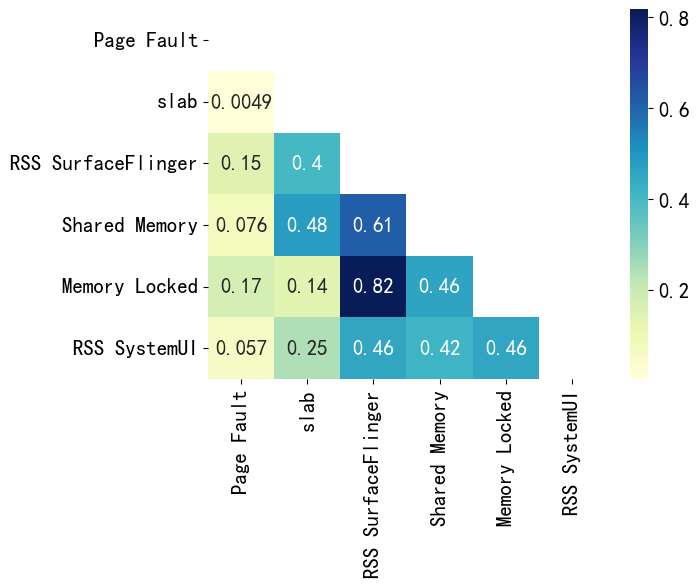

In [5]:
data = indicators_data_all.iloc[:,0]
indicators = ['pgfault', 'slab', 'rss_sf', 'mem_shared', 'mem_locked','rss_ui']

from scipy.stats import spearmanr
import numpy as np
correlation_matrix = np.random.rand(len(indicators), len(indicators))
plt.rcParams.update({'font.size': 15})
# 创建一个上三角矩阵
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

for i, indicator1 in enumerate(indicators): 
    # print(len(data[indicator1]))
    for j, indicator2 in enumerate(indicators):
        corr = spearmanr(data[indicator1][0:7161],data[indicator2][0:7161])
        correlation_matrix[i, j] = corr.statistic
        # if indicator1 != indicator2:
            # print(indicator1, indicator2)
            # print(corr)
            # print('-----------')
import seaborn as sns
indicators = ['Page Fault', 'slab', 'RSS SurfaceFlinger', 'Shared Memory', 'Memory Locked', 'RSS SystemUI']
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", xticklabels=indicators, yticklabels=indicators, mask=mask)
plt.savefig('corr.pdf', bbox_inches = 'tight')
